In [279]:
# DSC 530 Week 10 Term Project 

# Swati Dogra

In [282]:
# downloading the files from thinkstats

# Loading the Dataset and Selecting Variables


from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


# downloading the data files from thinkstats 

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")

In [284]:
import nsfg

In [286]:
# Read NSFG data into a Pandas DataFrame.

nsgf_df = nsfg.ReadFemPreg()
nsgf_df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [287]:
# Q1. A minimum of 5 variables in your dataset used during your analysis. 
# Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

# Q2. Describe what the 5 variables mean in the dataset (Chapter 1).


# Based on the previous weeks assignments, we will use below commonly used variables for our analysis

# agepreg: Age of the respondent during pregnancy.
# birthord: Birth order (1 for first-born, 2 for second-born).
# prglngth: Pregnancy length in weeks.
# totalwgt_lb: Total birth weight in pounds.
# birthwgt_lb: Birth weight in pounds (for live births).

In [302]:
# selecting the 5 variables from nsgf dataframe and print first few records

import pandas as pd

# Select the desired variables - agrpreg, birthord, prglngth, totalwgt_lb, birthwgt_lb

selected_vars = ['agepreg', 'birthord', 'prglngth', 'totalwgt_lb', 'birthwgt_lb']
selected_data = nsgf_df[selected_vars].fillna(0)
selected_data.head()

,agepreg,birthord,prglngth,totalwgt_lb,birthwgt_lb
0,33.16,1.0,39,8.8125,8.0
1,39.25,2.0,39,7.8750,7.0
2,14.33,1.0,39,9.1250,9.0
3,17.83,2.0,39,7.0000,7.0
4,18.33,3.0,39,6.1875,6.0


C:\Users\swati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\swati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

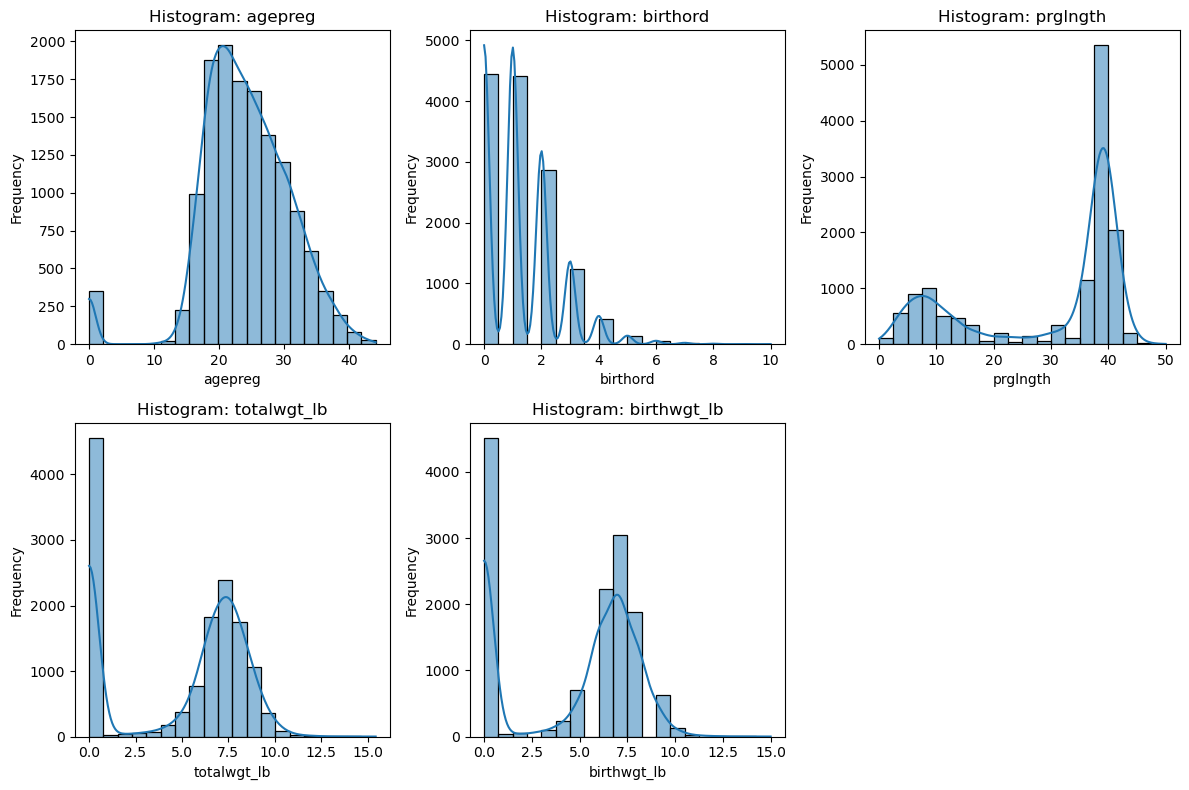

In [304]:
# Include a histogram of each of the 5 variables – in your summary and analysis, 
# identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).


# histograms for each variable to visualize their distributions

import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms
plt.figure(figsize=(12, 8))
for i, var in enumerate(selected_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(selected_data[var], bins=20, kde=True)
    plt.title(f'Histogram: {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [306]:
# Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

# Calculate the mean, mode, variance, skewness, and kurtosis for each variable

selected_data.describe()

,agepreg,birthord,prglngth,totalwgt_lb,birthwgt_lb
count,13593.000000,13593.000000,13593.000000,13593.000000,13593.000000
mean,24.048835,1.228647,29.531229,4.830924,4.565806
std,6.950623,1.209128,13.802523,3.616819,3.417546
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.830000,0.000000,13.000000,0.000000,0.000000
50%,23.660000,1.000000,39.000000,6.500000,6.000000
75%,28.580000,2.000000,39.000000,7.687500,7.000000
max,44.080000,10.000000,50.000000,15.437500,15.000000


In [308]:
skewness_value = stats.skew(selected_data, bias=True)
print("Skewness:", skewness_value)

Skewness: [-0.59953698  1.19298953 -0.8662986  -0.41531896 -0.39441095]


In [310]:
# If skewness_value is:
# Close to 0: The distribution is approximately symmetric.
# Greater than 0: The distribution has more weight in the left tail (positively skewed).
# Less than 0: The distribution has more weight in the right tail (negatively skewed).

In [312]:
kurtosis_value = stats.kurtosis(selected_data, fisher=True, bias=True)
print("Kurtosis:", kurtosis_value)

Kurtosis: [ 2.11645849  2.1520471  -1.02838981 -1.50079142 -1.47170091]


In [314]:
# Kurtosis is a statistical measure that describes the “tailedness” of a probability distribution.
# Negative excess kurtosis indicates platykurtic behavior - Distributions with thin tails (produce fewer and less extreme outliers)
# Positive excess kurtosis indicates leptokurtic behavior - Distributions with fat tails (produce more outliers)

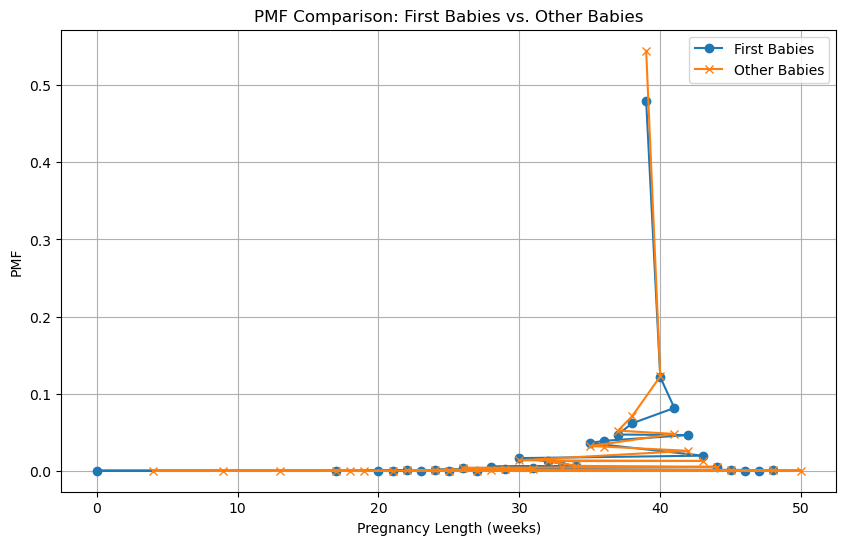

In [317]:
# Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, 
# this isn’t comparing two variables against each other – it is the same variable, but a different scenario. 
# Almost like a filter. The example in the book is first babies compared to all other babies, 
# it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).


selected_columns2 = ['prglngth', 'birthord']
filtered_data = nsgf_df[selected_columns2]

# Separate first babies and other babies
first_babies = filtered_data[filtered_data['birthord'] == 1]
other_babies = filtered_data[filtered_data['birthord'] > 1]

# Calculate PMFs
pmf_first = first_babies['prglngth'].value_counts(normalize=True)
pmf_other = other_babies['prglngth'].value_counts(normalize=True)

# Plot PMFs
plt.figure(figsize=(10, 6))
plt.plot(pmf_first.index, pmf_first.values, label='First Babies', marker='o')
plt.plot(pmf_other.index, pmf_other.values, label='Other Babies', marker='x')
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('PMF')
plt.title('PMF Comparison: First Babies vs. Other Babies')
plt.legend()
plt.grid(True)
plt.show()

In [319]:
# Probability Mass Function (PMF) - The PMF is a function that gives the probability that a discrete random variable takes on a specific value.
# It provides the probability distribution for discrete variables.

# In this case, we see the comparision between First babies and Other babies for various Pregnancy Lengths.

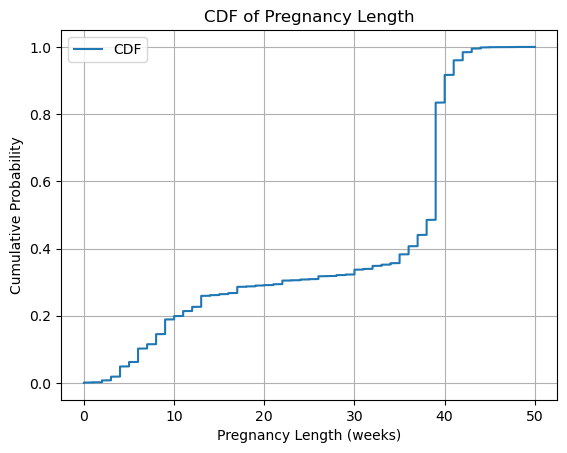

In [322]:
# Create 1 CDF with one of your variables, using page 41-44 as your guide, 
# what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

import numpy as np

# Select the 'prglngth' column
pregnancy_lengths = nsgf_df['prglngth']

# Sort the data
sorted_lengths = np.sort(pregnancy_lengths)

# Calculate CDF values
cdf_values = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)

# Plot the CDF
plt.plot(sorted_lengths, cdf_values, label='CDF')
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Pregnancy Length')
plt.grid(True)
plt.legend()
plt.show()

In [323]:
# Interpretation:

# The x-axis represents pregnancy length in weeks, and the y-axis represents the cumulative probability.
# The CDF shows how the probability of having a pregnancy length less than or equal to a specific value changes as we move along the x-axis.
# For example, if we look at the CDF value at week 40, it tells us the probability of having a pregnancy length of 40 weeks or less.
# The CDF can help address questions related to the distribution of pregnancy lengths and provide insights into the likelihood of specific durations.

In [327]:
# Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [329]:
# Analytical Distribution (Normal Distribution):

# The normal distribution (also known as the Gaussian distribution) is a common continuous probability distribution.
# It is characterized by its bell-shaped curve, with symmetric tails.
# Parameters of the normal distribution include the mean (μ) and standard deviation (σ).
# Applying the Normal Distribution to prglngth:
# We’ll fit a normal distribution to the observed pregnancy lengths and compare it to the empirical data.
# This can help us understand how well the normal distribution approximates the actual distribution of pregnancy lengths.

C:\Users\swati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


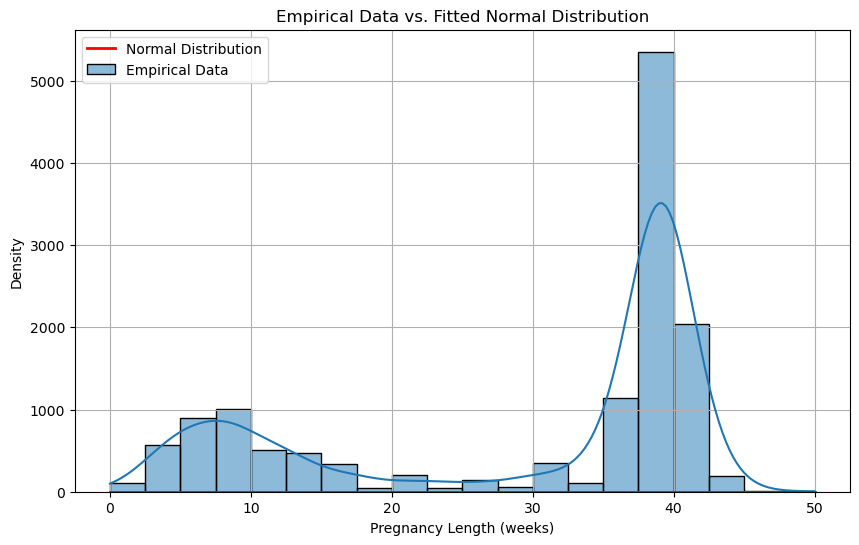

In [331]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


pregnancy_lengths = nsgf_df['prglngth']

# Fit a normal distribution to the data
mu, sigma = pregnancy_lengths.mean(), pregnancy_lengths.std()
normal_dist = norm(mu, sigma)

# Generate points for the normal distribution
x = np.linspace(pregnancy_lengths.min(), pregnancy_lengths.max(), 1000)
pdf_values = normal_dist.pdf(x)

# Plot the empirical data and the fitted normal distribution
plt.figure(figsize=(10, 6))
sns.histplot(pregnancy_lengths, bins=20, kde=True, label='Empirical Data')
plt.plot(x, pdf_values, label='Normal Distribution', color='red', linewidth=2)
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('Density')
plt.title('Empirical Data vs. Fitted Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [333]:
# Analysis:
# The red normal distribution curve fits the histogram of actual pregnancy lengths.
# Data closely follows the curve, the normal distribution is a good approximation.
# Deviations from the curve may indicate non-normality or other underlying patterns.

In [336]:
# Create two scatter plots comparing two variables and provide your analysis on correlation and causation. 
# Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

In [338]:
# Scatter Plot 1: prglngth vs. birthwgt_lb
# We’ll compare pregnancy length with birth weight.
# If there’s a relationship, we’ll observe it in the scatter plot.

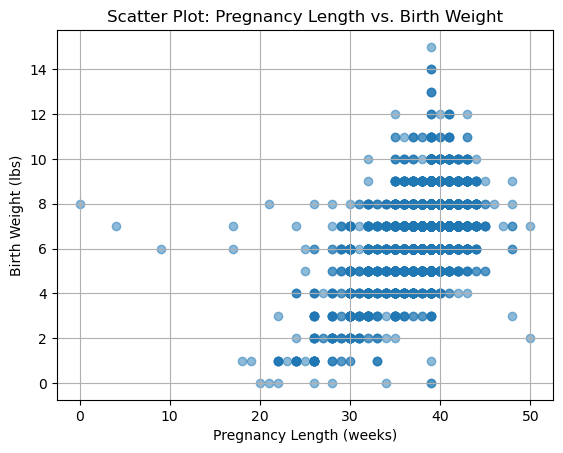

In [340]:
import matplotlib.pyplot as plt

prglngth = nsgf_df['prglngth']
birthwgt_lb = nsgf_df['birthwgt_lb']

# Create the scatter plot
plt.scatter(prglngth, birthwgt_lb, alpha=0.5)
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('Birth Weight (lbs)')
plt.title('Scatter Plot: Pregnancy Length vs. Birth Weight')
plt.grid(True)
plt.show()


In [342]:
# Analyze the plot:
# Look for any trend (positive or negative) between pregnancy length and birth weight.
# Calculate the covariance and Pearson’s correlation coefficient.

In [344]:
# Correlation: If points cluster along a line, there might be a linear correlation.
# Causation: Correlation doesn’t imply causation; consider other factors.
# Non-Linear Relationships: Explore polynomial fits or other models if needed.
# In this case, we see a correlation mostly between 30 and 45 weeks of pregnancy lengthfor birth weight ranging from 4lbs to 8lbs

In [348]:
# Conduct a test on your hypothesis using one of the methods covered in Chapter 9

In [350]:
import pandas as pd
import scipy.stats as stats

first_babies = nsgf_df[nsgf_df['birthord'] == 1]['prglngth']
other_babies = nsgf_df[nsgf_df['birthord'] > 1]['prglngth']

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(other_babies, first_babies.mean())

# Print results
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in pregnancy lengths.")
else:
    print("Fail to reject the null hypothesis: No significant difference in pregnancy lengths.")


t-statistic: -2.0528
p-value: 0.0401
Reject the null hypothesis: There is a significant difference in pregnancy lengths.


In [353]:
# For this project, conduct a regression analysis on either one dependent and one explanatory variable, 
# or multiple explanatory variables (Chapter 10 & 11).

In [355]:
import pandas as pd
import statsmodels.api as sm

# 'agepreg' is the explanatory variable, and 'prglngth' is the dependent variable

selected_nonzero_data = selected_data.fillna(0)

# Add a constant term for the intercept
X = sm.add_constant(selected_nonzero_data['agepreg'].dropna())
y = selected_nonzero_data['prglngth'].dropna()

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               prglngth   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     182.5
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           2.54e-41
Time:                        23:31:25   Log-Likelihood:                -54876.
No. Observations:               13593   AIC:                         1.098e+05
Df Residuals:                   13591   BIC:                         1.098e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0340      0.424     56.741      0.0

In [358]:
from sklearn.linear_model import LinearRegression

# 'agepreg', 'birthord', and 'birthwgt_lb' are explanatory variables

selected_nonzero_data = selected_data.fillna(0)

X_multi = selected_nonzero_data[['agepreg', 'birthord', 'birthwgt_lb']].dropna()
y_multi = selected_nonzero_data['prglngth'].dropna()

# Fit the multiple linear regression model
multi_model = LinearRegression().fit(X_multi, y_multi)

# Print coefficients
print("Coefficients:", multi_model.coef_)
print("Intercept:", multi_model.intercept_)


Coefficients: [-0.15248848  1.5423402   3.33338275]
Intercept: 16.08382910688524


In [361]:
# Outcome of your EDA (Exploratory Data Analysis) :

# Dataset Overview: For the NSFG dataset, we selected below variables for data analysis using various statistical methods
## agepreg: Age of the respondent during pregnancy.
## birthord: Birth order (1 for first-born, 2 for second-born).
## prglngth: Pregnancy length in weeks.
## totalwgt_lb: Total birth weight in pounds.
## birthwgt_lb: Birth weight in pounds (for live births).
## also, for further analysis we have filled in NaN values with zeros to ensure we have better statistical information.

# Descriptive Statistics: For the above listed variables we have calcualated summary statistics to review 
# mean, mode, variance, skewness, and kurtosis for each variable.
## 1.	Summary Statistics:
##	We calculated essential summary statistics for each variable, including measures like mean, mode, variance, skewness, and kurtosis.
##	These statistics provide insights into central tendencies (mean), variability (variance), and the shape of the distribution (skewness and kurtosis).
## 2.	Skewness:
##	Skewness indicates the asymmetry of the distribution.
##	Birthord exhibits positive skewness, suggesting that higher birth orders are less common.
##	All other variables (prglngth, totalwgt_lb, birthwgt_lb, and agrepreg) show negative skewness, indicating concentration toward lower values.
## 3.	Outliers and Tails:
##	We examined the tails of the distributions to identify outliers.
##	agrepreg and birthord have noticeable outliers, likely due to extreme ages or unusual circumstances.
##	In contrast, prglngth, totalwgt_lb, and birthwgt_lb exhibit fewer outliers, aligning with expected concentration 
##  ranges for pregnancy duration and birth weights.
## 4.	Interpretation:
##	Understanding these characteristics helps us contextualize the data and make informed decisions during subsequent analyses.
##	For instance, skewed distributions may impact statistical tests, and outliers may require special handling.


# Distribution Analysis:
## Probability Mass Function (PMF) - The PMF is a function that gives the probability that a discrete random variable takes on a specific value.
## It provides the probability distribution for discrete variables. In this case, we see the comparision between First babies 
## and Other babies for various Pregnancy Lengths.

## Cummulative Distribution Function (CDF) - The x-axis represents pregnancy length in weeks, and the y-axis represents the cumulative probability.
## The CDF shows how the probability of having a pregnancy length less than or equal to a specific value changes as we move along the x-axis.
## For example, if we look at the CDF value at week 40, it tells us the probability of having a pregnancy length of 40 weeks or less.

## Normal Distribution: The normal distribution curve fits the histogram of actual pregnancy lengths. 
## Data closely follows the curve, the normal distribution is a good approximation. Deviations from the curve 
## indicate non-normality or other underlying patterns.


# Correlations and Relationships:
## 1.	Clustering Along a Line:
##	When data points cluster along a line, it suggests a potential linear correlation.
##	Imagine plotting pregnancy length (in weeks) against birth weight (in pounds). As the points align along a trend, we suspect a relationship.
## 2.	The Observed Correlation:
##	In our case, we observe a correlation primarily between pregnancy lengths of 30 to 45 weeks and birth weights ranging from 4 lbs to 8 lbs.
##	This alignment suggests that as pregnancy length increases within this range, birth weight tends to fall within a specific band.
## 3.	Interpretation:
##	The correlation could indicate that longer pregnancies (within the mentioned range) tend to result in healthier birth weights.


# What do you feel was missed during the analysis? :
## We’ve covered a lot, but one thing we might have missed during the analysis is the Chi-Square test. 
## It helps explore relationships between categorical variables and assess whether observed differences are statistically significant


# Were there any variables you felt could have helped in the analysis? :
## 1.	Considered Variables:
##	While analyzing the NSGF data, we focused on specific variables that contribute significantly to our research. However there are other 
##	variables like howpreg (how the pregnancy was identified) and multbrth (whether the pregnancy resulted in multiple births) 
## are crucial for detailed analysis.
## 2.	Potential Insights:
##	howpreg: Understanding how pregnancies are identified (e.g., home test, doctor’s visit) can impact family planning and health outcomes.
##	multbrth: Multiple births (twins, triplets) have unique implications for maternal health, child development, and family dynamics.
## 3.	Further Exploration:
##	By examining these variables and others, we can uncover patterns, correlations, and insights relevant to family growth and reproductive behavior.


# Were there any assumptions made you felt were incorrect? :
## I assumed zero values to fill in the missing data for these variables, which could have affected some of the statistical analyses. 
## Alternatively, we could have used mean values for imputation, but it’s essential to recognize that this is synthetic data and not actual observations

# What challenges did you face, what did you not fully understand? :
## One of the major challenges is selection of variables - reviewing what was done in previous weeks has helped a lot in determining the right set of 
## variables for this project. The outline made in the project to refering to particular chapters truly helped to revise certain concepts 
## whenever there is a challenge with code syntax.